In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# History

In [2]:
def plot_columns(df, columns, ylim=None, logaxis=False):
    # Check if 'Iteration' is a column in the DataFrame
    if 'Iteration' not in df.columns:
        raise ValueError("The DataFrame does not contain an 'Iteration' column.")
    
    # Check if all columns in the list are present in the DataFrame
    for column in columns:
        if column not in df.columns:
            raise ValueError(f"The DataFrame does not contain the column: {column}")
    
    # Plotting each specified column against the 'Iteration' column
    plt.figure(figsize=(20, 6))
    for column in columns:
        plt.plot(df['Iteration'], df[column], label=column)

    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    # Setting the y-axis to a logarithmic scale if specified
    if logaxis:
        plt.yscale('log')

    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.title('Plot of Columns over Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
history = 'history/training_history.csv'
history = pd.read_csv(history)

history.head()

,Elapsed Time,Iteration,Total Iterations,D/latent_real,D/latent_fake,D/latent_reg,D/ref_real,D/ref_fake,D/ref_reg,G/latent_adv,...,G/ref_adv,G/ref_dom,G/ref_trts,G/ref_cyc,G/ref_id,G/ref_sty,G/ref_ds,G/lambda_ds,G/lambda_dom,G/lambda_trts
0,0:01:00,100,100000,0.113541,0.026717,0.014594,0.008935,0.041825,0.010954,0.631596,...,0.499421,48.027866,13.055182,0.306168,0.235389,2.069355,0.018146,0.0,0.00495,0.0
1,0:01:33,200,100000,0.122912,0.004065,0.048414,0.008781,0.140119,0.016274,0.471318,...,0.447132,13.641644,2.153839,0.160210,0.119451,0.358000,0.007775,0.0,0.00995,0.0
2,0:02:06,300,100000,0.129616,0.006062,0.042067,0.014440,0.145032,0.028497,0.440259,...,0.302311,13.255705,4.145519,0.110285,0.082285,0.335898,0.003721,0.0,0.01495,0.0
3,0:02:39,400,100000,0.132914,0.005457,0.024192,0.035537,0.150271,0.021813,0.521144,...,0.201335,8.565959,7.459124,0.091523,0.078059,0.164849,0.003384,0.0,0.01995,0.0
4,0:03:13,500,100000,0.112618,0.008754,0.027707,0.025417,0.158618,0.022666,0.429843,...,0.216643,12.670306,5.242368,0.074260,0.065778,0.432188,0.001946,0.0,0.02495,0.0


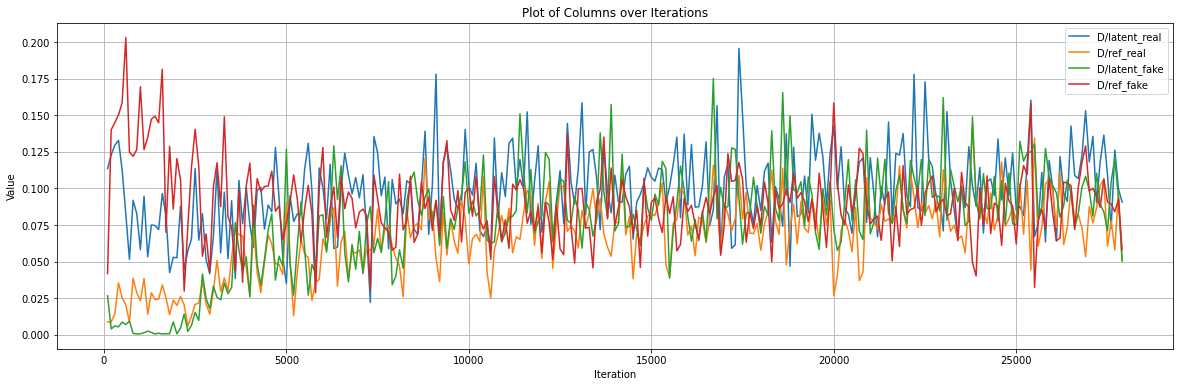

In [4]:
plot_columns(history, ['D/latent_real', 'D/ref_real', 'D/latent_fake', 'D/ref_fake'], logaxis=False)

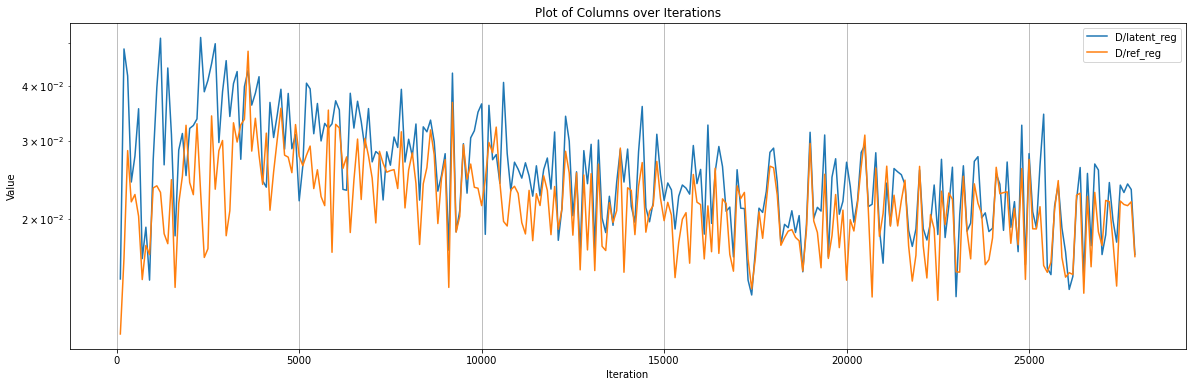

In [5]:
plot_columns(history, ['D/latent_reg', 'D/ref_reg'], logaxis=True)

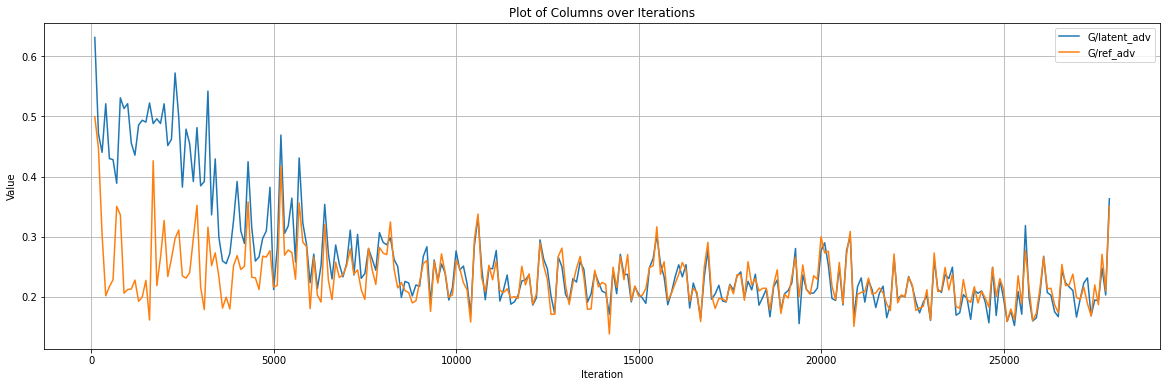

In [6]:
plot_columns(history, ['G/latent_adv', 'G/ref_adv'], logaxis=False)

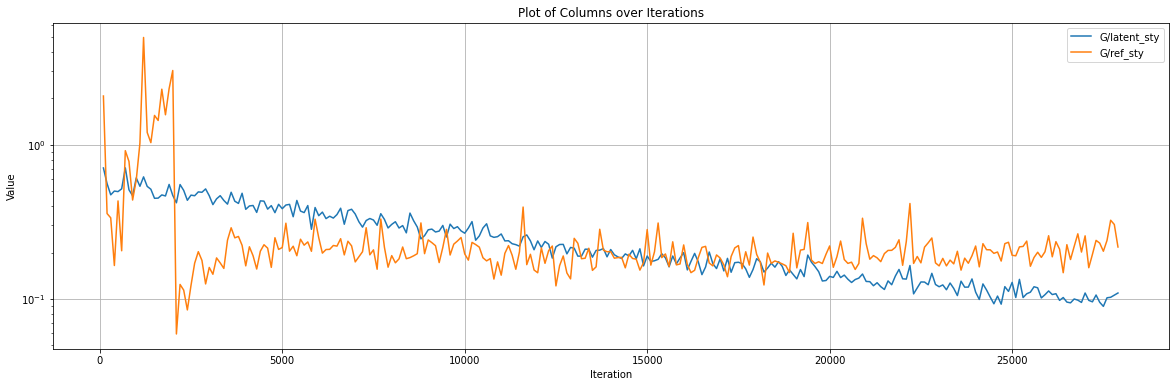

In [7]:
plot_columns(history, ['G/latent_sty', 'G/ref_sty'], logaxis=True)

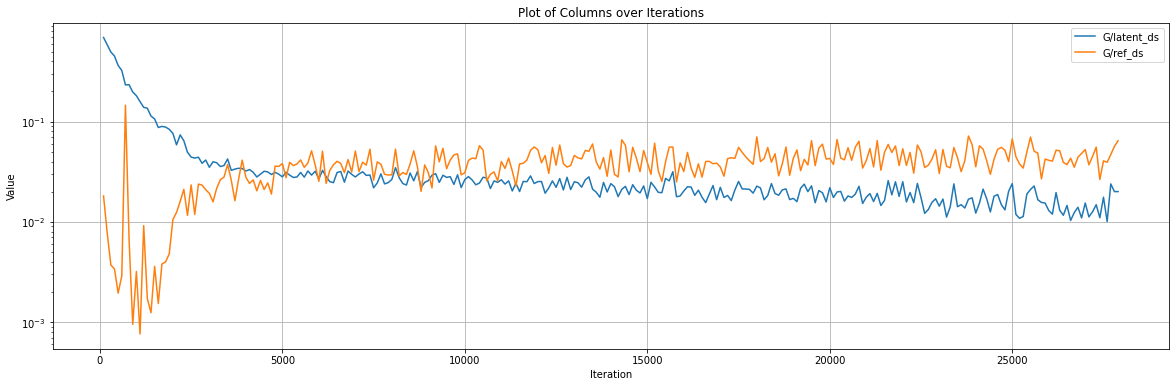

In [8]:
plot_columns(history, ['G/latent_ds', 'G/ref_ds'], logaxis=True)

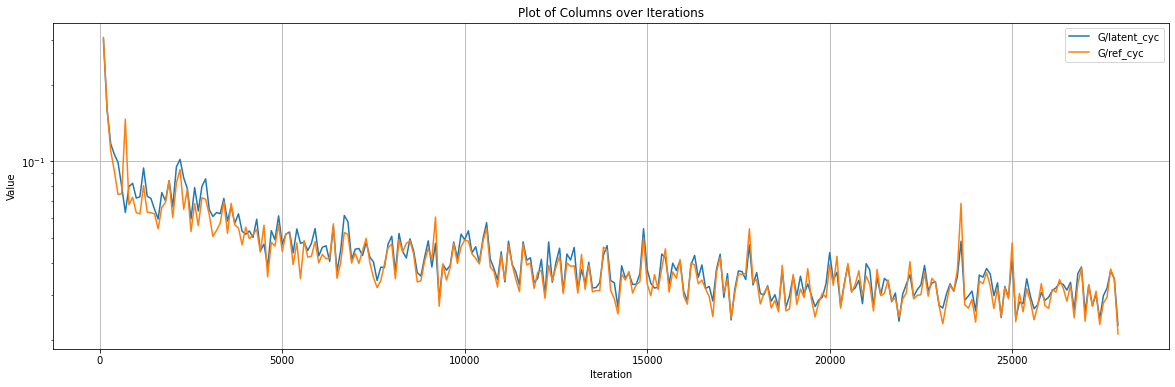

In [9]:
plot_columns(history, ['G/latent_cyc', 'G/ref_cyc'], logaxis=True)

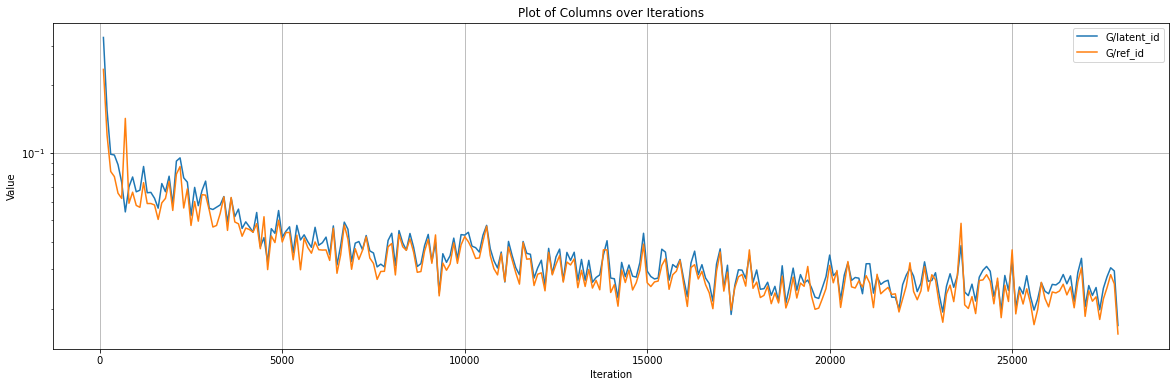

In [10]:
plot_columns(history, ['G/latent_id', 'G/ref_id'], logaxis=True)

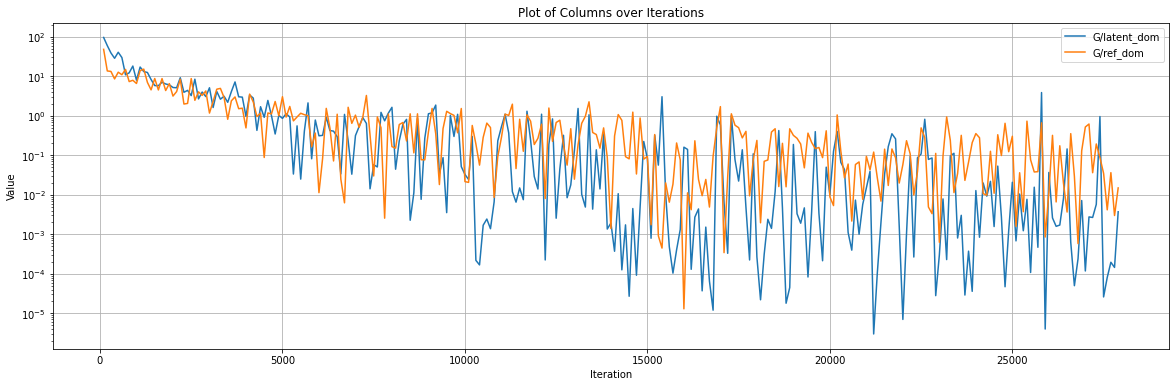

In [11]:
plot_columns(history, ['G/latent_dom', 'G/ref_dom'], logaxis=True)

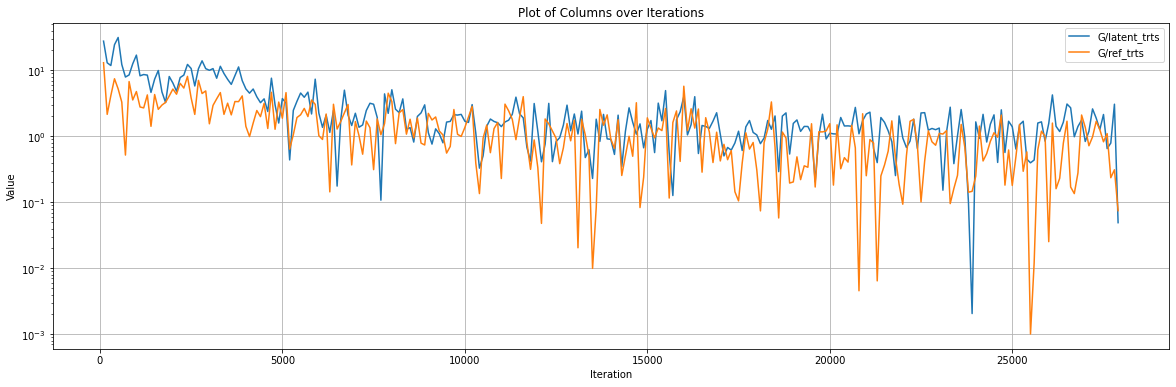

In [12]:
plot_columns(history, ['G/latent_trts', 'G/ref_trts'], logaxis=True)

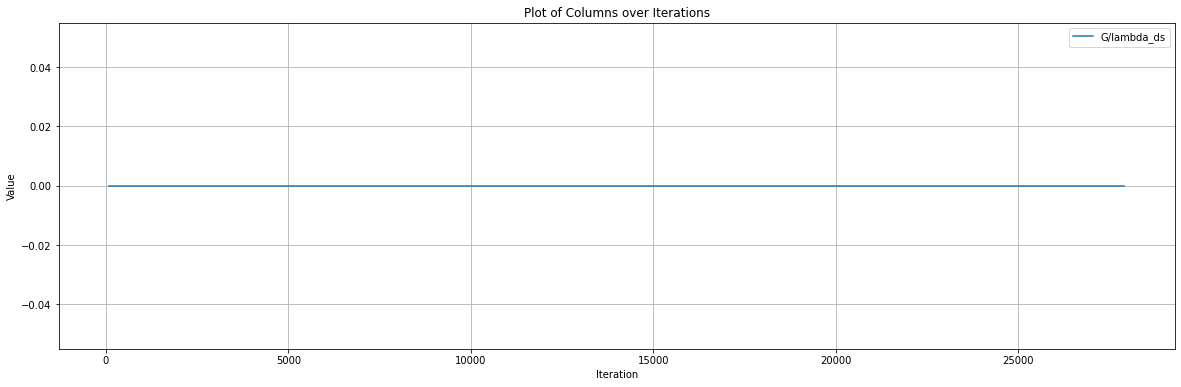

In [13]:
plot_columns(history, ['G/lambda_ds'])

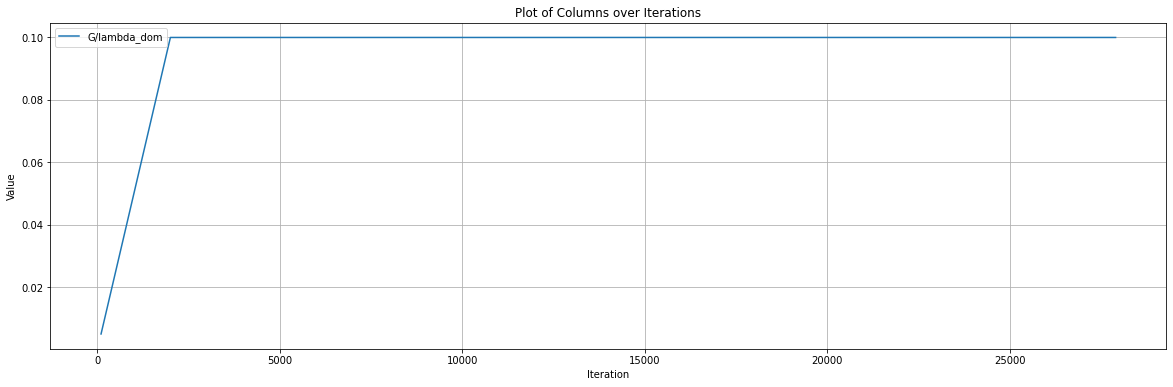

In [14]:
plot_columns(history, ['G/lambda_dom'])

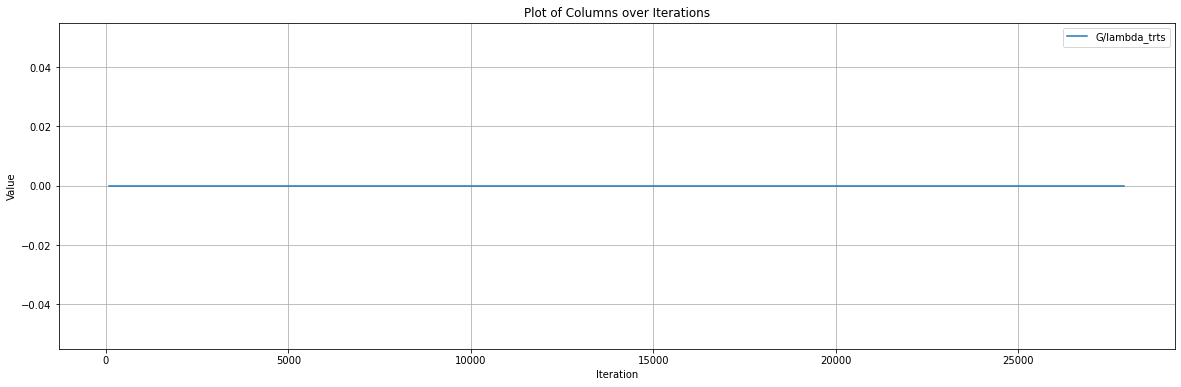

In [21]:
plot_columns(history, ['G/lambda_trts'])

# Metrics

In [15]:
file_path = 'eval/classification_scores.csv'
classification_scores = pd.read_csv(file_path)
classification_scores.head()

,step,mode,source,target,domain,accuracy,loss
0,2000,latent,WAL,CLU,10,0.355662,7.618069
1,2000,latent,WAL,CLU,11,0.330537,7.600244
2,2000,latent,WAL,CLU,12,0.358108,5.711433
3,2000,latent,WAL,CLU,13,0.203593,7.460879
4,2000,latent,WAL,CLU,14,0.345638,6.257997


Maximum accuracy for CLD in latent mode: 0.8133 at step 12000
Maximum accuracy for CLU in latent mode: 0.8175 at step 16000
Maximum accuracy for RUN in latent mode: 0.4881 at step 8000
Maximum accuracy for WAL in latent mode: 0.9054 at step 16000


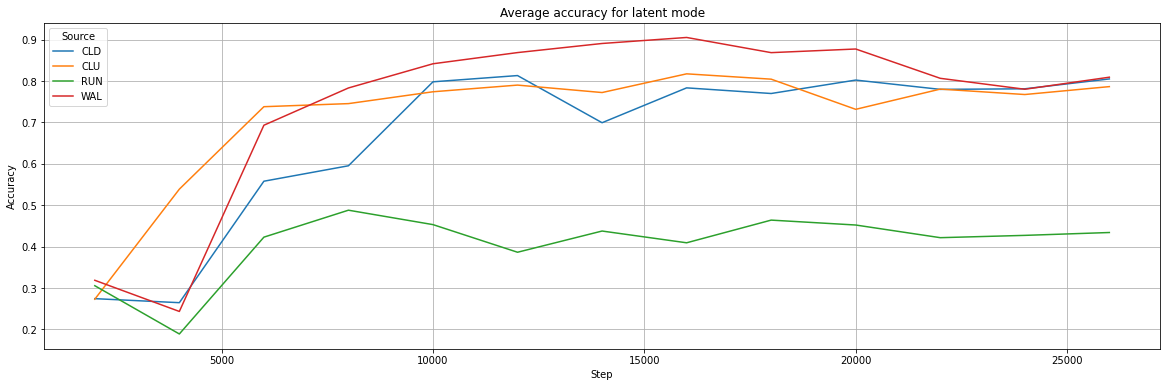

Maximum accuracy for CLD in reference mode: 0.9164 at step 26000
Maximum accuracy for CLU in reference mode: 0.8672 at step 22000
Maximum accuracy for RUN in reference mode: 0.7478 at step 12000
Maximum accuracy for WAL in reference mode: 0.9475 at step 26000


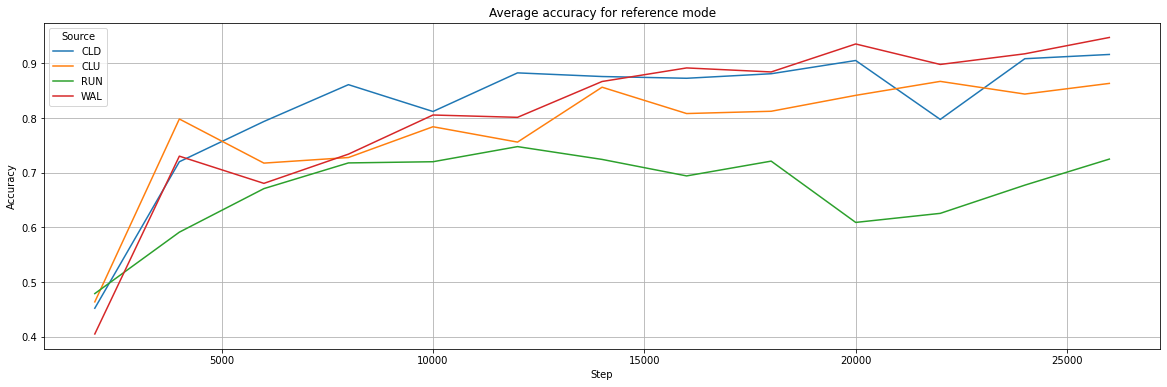

Minimum loss for CLD in latent mode: 0.5419 at step 16000
Minimum loss for CLU in latent mode: 0.7848 at step 18000
Minimum loss for RUN in latent mode: 2.2155 at step 8000
Minimum loss for WAL in latent mode: 0.4251 at step 16000


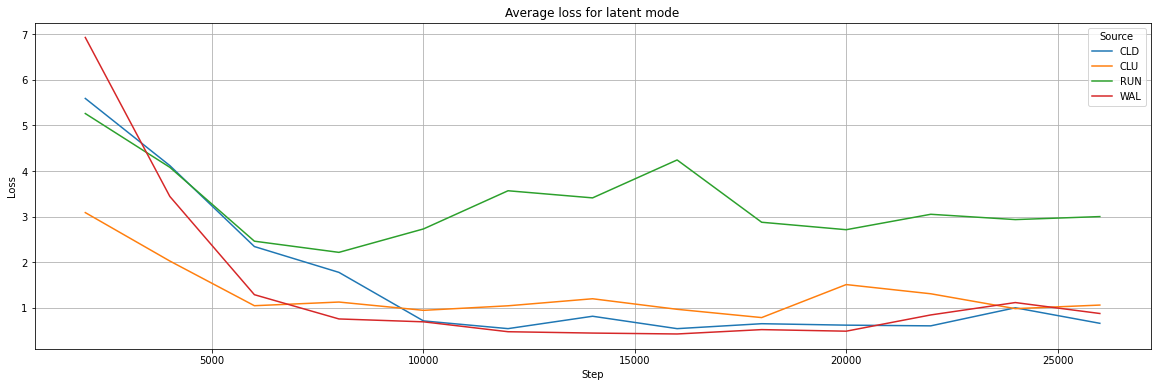

Minimum loss for CLD in reference mode: 0.4303 at step 24000
Minimum loss for CLU in reference mode: 0.5542 at step 20000
Minimum loss for RUN in reference mode: 1.1050 at step 18000
Minimum loss for WAL in reference mode: 0.2291 at step 26000


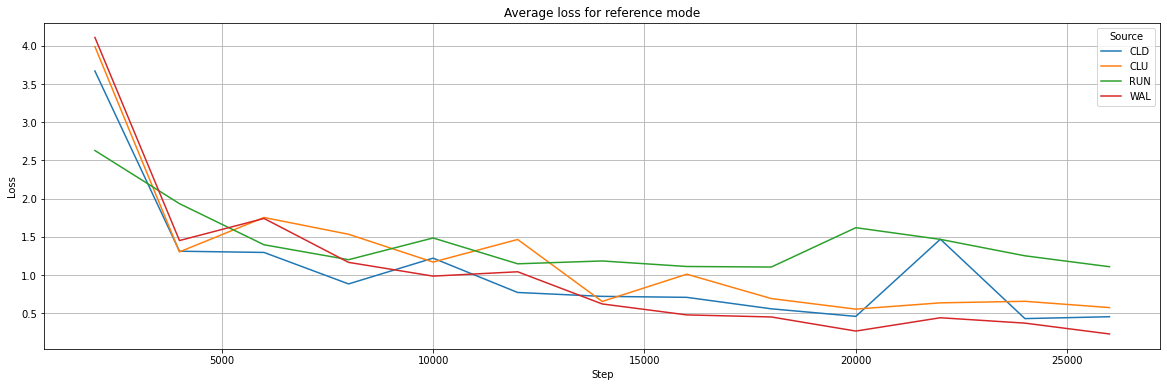

In [16]:
def plot_average_by_mode_metric(metrics, mode, metric):
    
    # Filter the DataFrame based on the mode and metric
    filtered_data = metrics[(metrics['mode'] == mode)]

    # Group by 'step' and 'source', then calculate the mean for each group
    mean_data = filtered_data.groupby(['step', 'source']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    for source in mean_data['source'].unique():
        source_data = mean_data[mean_data['source'] == source]
        plt.plot(source_data['step'], source_data[metric], label=source)
        if metric == 'accuracy':
            # Find the maximum value of the metric and its corresponding step
            max_value = source_data[metric].max()
            max_step = source_data[source_data[metric] == max_value]['step'].values[0]
            print(f'Maximum {metric} for {source} in {mode} mode: {max_value:.4f} at step {max_step}')
        elif metric == 'loss':
            # Find the minimum value of the metric and its corresponding step
            min_value = source_data[metric].min()
            min_step = source_data[source_data[metric] == min_value]['step'].values[0]
            print(f'Minimum {metric} for {source} in {mode} mode: {min_value:.4f} at step {min_step}')

    plt.title(f'Average {metric} for {mode} mode')
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Source')
    plt.grid(True)
    plt.show()

for metric in ['accuracy', 'loss']:
    for mode in classification_scores['mode'].unique():
        plot_average_by_mode_metric(classification_scores, mode, metric)

Maximum accuracy for CLD: 0.8608 at step 26000
Maximum accuracy for CLU: 0.8250 at step 26000
Maximum accuracy for RUN: 0.6030 at step 8000
Maximum accuracy for WAL: 0.9065 at step 20000


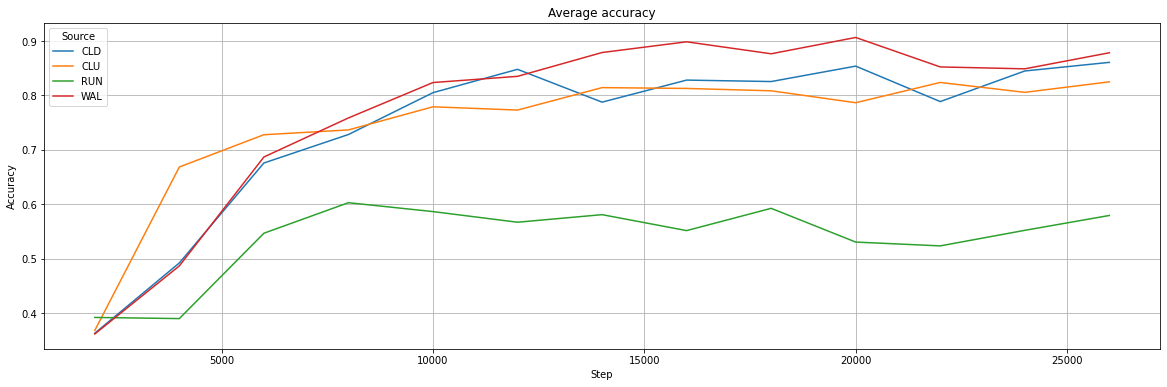

Minimum loss for CLD: 0.5390 at step 20000
Minimum loss for CLU: 0.7386 at step 18000
Minimum loss for RUN: 1.7083 at step 8000
Minimum loss for WAL: 0.3768 at step 20000


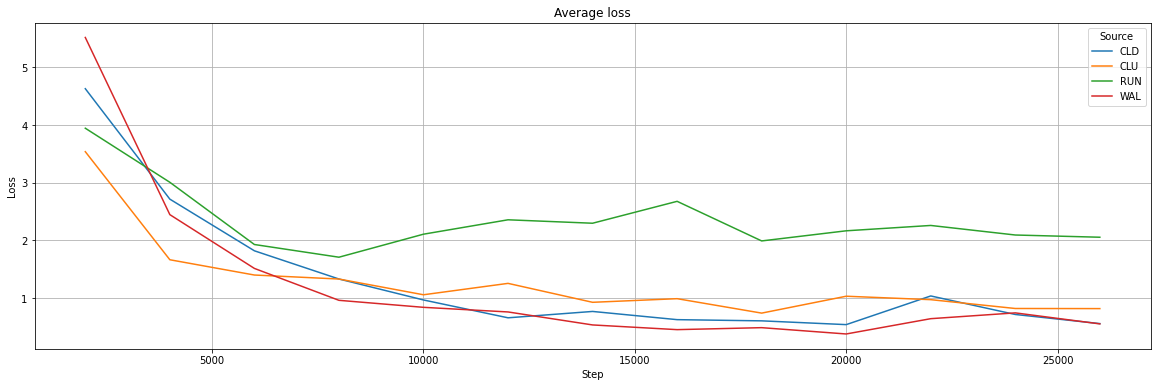

In [17]:
def plot_average_by_activity(metrics, metric):
    
    # Filter the DataFrame based on the mode and metric
    filtered_data = metrics

    # Group by 'step' and 'source', then calculate the mean for each group
    mean_data = filtered_data.groupby(['step', 'source']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    for source in mean_data['source'].unique():
        source_data = mean_data[mean_data['source'] == source]
        plt.plot(source_data['step'], source_data[metric], label=source)
        if metric == 'accuracy':
            # Find the maximum value of the metric and its corresponding step
            max_value = source_data[metric].max()
            max_step = source_data[source_data[metric] == max_value]['step'].values[0]
            print(f'Maximum {metric} for {source}: {max_value:.4f} at step {max_step}')
        elif metric == 'loss':
            # Find the minimum value of the metric and its corresponding step
            min_value = source_data[metric].min()
            min_step = source_data[source_data[metric] == min_value]['step'].values[0]
            print(f'Minimum {metric} for {source}: {min_value:.4f} at step {min_step}')
            # source_data.to_csv(f'{source}_{metric}.csv', index=False)

    plt.title(f'Average {metric}')
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.legend(title='Source')
    plt.grid(True)
    plt.show()

for metric in ['accuracy', 'loss']:
    plot_average_by_activity(classification_scores, metric)

Max in latent mode: 0.7289 at step 16000
Max in reference mode: 0.8631 at step 26000


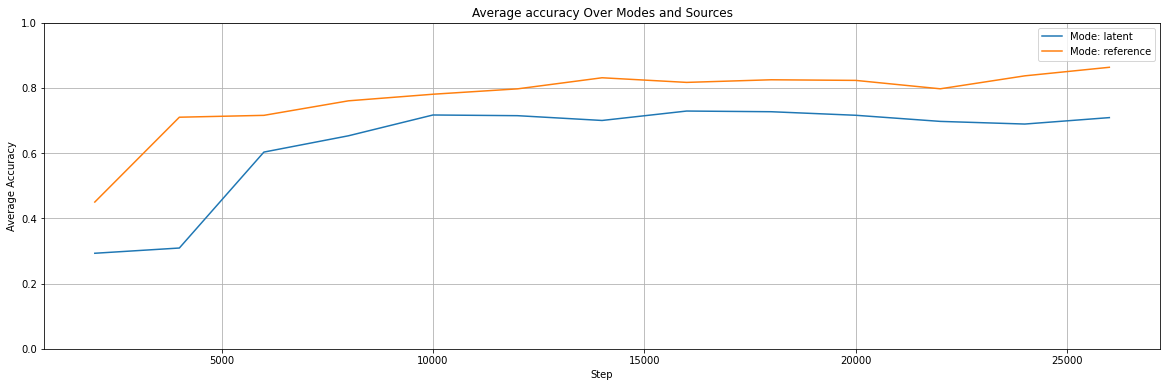

Min in latent mode: 1.2080 at step 18000
Min in reference mode: 0.5918 at step 26000


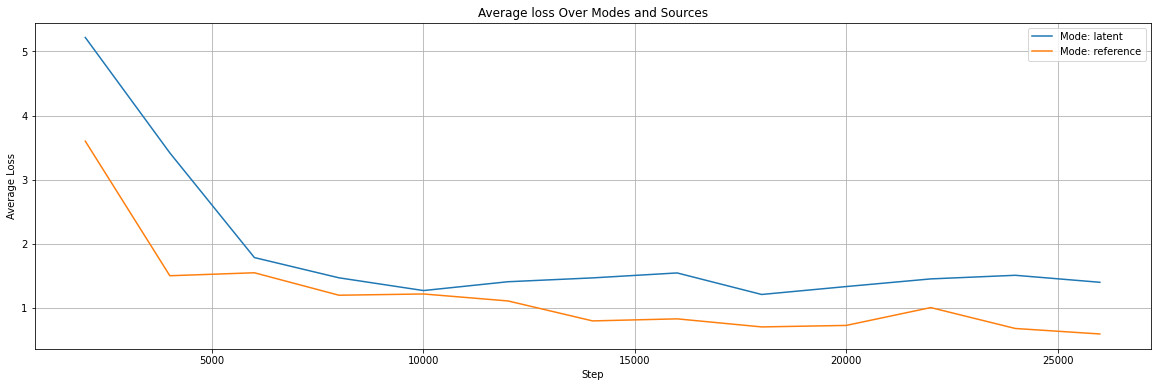

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_average_metric_over_modes_sources(metrics, metric, ylim=None):
    """
    Plots two lines, each representing the average of values for each mode, averaged over all sources.
    
    Parameters:
        metrics (pd.DataFrame): DataFrame containing the metrics.
        metric (str): The metric to filter by (e.g., 'accuracy' or 'logloss').
    """
    # Filter the DataFrame based on the metric
    filtered_data = metrics

    # Group by 'step', 'mode' and then calculate the mean across 'source' and 'subject'
    mean_data = filtered_data.groupby(['step', 'mode']).agg({metric: 'mean'}).reset_index()

    # Plotting
    plt.figure(figsize=(20, 6))
    modes = mean_data['mode'].unique()
    for mode in modes:
        mode_data = mean_data[mean_data['mode'] == mode]
        # mode_data.to_csv(f'{mode}_{metric}.csv', index=False)
        plt.plot(mode_data['step'], mode_data[metric], label=f'Mode: {mode}')
        max_value = mode_data[metric].max()
        min_value = mode_data[metric].min()
        if metric == 'accuracy':
            step = mode_data[mode_data[metric] == max_value]['step'].values[0]
            print(f'Max in {mode} mode: {max_value:.4f} at step {step}')
        else:
            step = mode_data[mode_data[metric] == min_value]['step'].values[0]
            print(f'Min in {mode} mode: {min_value:.4f} at step {step}')
    
    # Setting the y-axis limits if specified
    if ylim is not None:
        plt.ylim(ylim)

    plt.title(f'Average {metric} Over Modes and Sources')
    plt.xlabel('Step')
    plt.ylabel(f'Average {metric.capitalize()}')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_average_metric_over_modes_sources(classification_scores, 'accuracy', ylim=(0, 1))
plot_average_metric_over_modes_sources(classification_scores, 'loss')

In [19]:
domain_scores = pd.read_csv('eval/domain_scores.csv')
domain_scores.head()

,step,mode,source,target,accuracy,loss
0,2000,latent,WAL,RUN,0.205569,5.125389
1,2000,latent,WAL,CLD,0.201474,4.089477
2,2000,latent,WAL,CLU,0.211302,5.405132
3,2000,latent,RUN,WAL,0.272892,4.301262
4,2000,latent,RUN,CLD,0.168631,5.212971


Maximum accuracy in latent mode: 0.4214 at step 26000


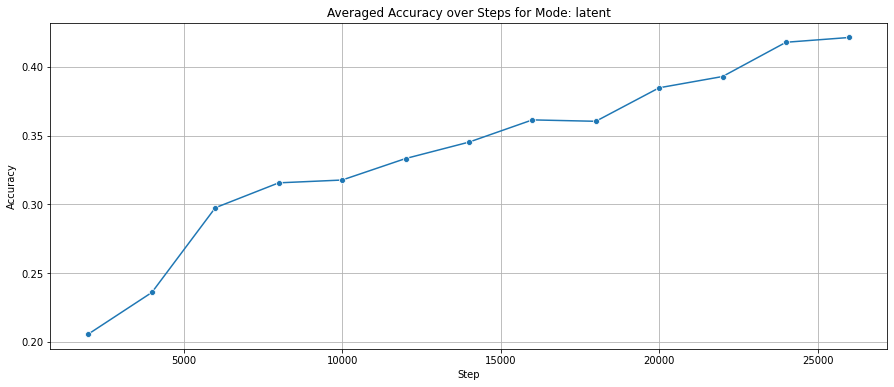

Maximum accuracy in reference mode: 0.3642 at step 26000


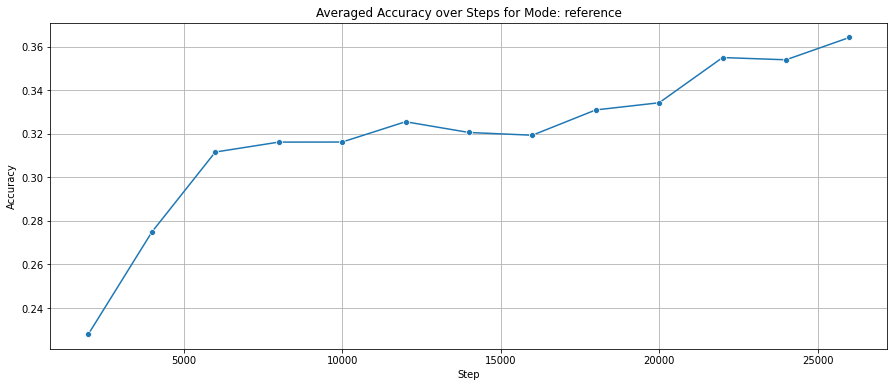

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def plot_metric_averaged(data, mode, metric):
    # Filter the DataFrame based on mode
    filtered_data = data[data['mode'] == mode]
    
    # Group by step and calculate the mean of the metric
    averaged_data = filtered_data.groupby('step', as_index=False)[metric].mean()

    # Print the maximum value of the metric and its corresponding step
    max_value = averaged_data[metric].max()
    max_step = averaged_data[averaged_data[metric] == max_value]['step'].values[0]
    print(f'Maximum {metric} in {mode} mode: {max_value:.4f} at step {max_step}')
    
    # Plotting the line plot
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=averaged_data, x='step', y=metric, marker='o')
    plt.title(f"Averaged {metric.capitalize()} over Steps for Mode: {mode}")
    plt.xlabel('Step')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.show()



for mode in domain_scores['mode'].unique():
    plot_metric_averaged(domain_scores, mode, 'accuracy')